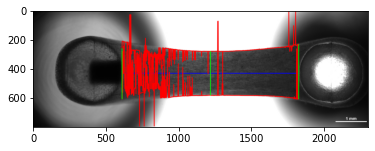

horizontal inner distance between rois: 1215.0 (microns)
vertical thickness at inner edge of left ROI : 345.0 (microns)
vertical thickness at midpoint between rois: 301.0 (microns)
vertical thickness at inner edge of right ROI : 373.0 (microns)
area between rois: 339133.0 (microns)


In [1]:
from morphology import morphologyMetrics
from cv2 import cv2 as cv
from matplotlib import pyplot as plt
%matplotlib inline

# search_image_path:            Path to the image morphology metrics are to be computed for.
#                               if search_image_path does not exist, is "" or "select" (case is ignored),
#                               a small window will pop up allowing selection from the file system.
#
# template_image_paths:         A list of 2 paths to templates that will be located in search_image. 
#                               These templates should have inner edges that form vertical end points of
#                               a sub region in search_image that will be analyzed i.e.
#                               the left template should have it's right vertical edge as the
#                               left most point in search_image to consider, and 
#                               the right template should have it's left vertical edge as the 
#                               right most point in search_image to consider.
#                               - If template_image_paths does not exist is None or "select (case is ignored),
#                               a small window will pop up allowing selection from the file system.
#                               - If template_image_paths is "draw", a small window will pop up, and
#                               you can manually select a ROIs. To draw the ROIs, draw the bounding box
#                               for the left most roi and then hit enter, then draw the bounding box for the
#                               right most roi and then hit enter, then hit ESC to complete the selection.
#

# test_dir = '/storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_edge_detection/'
test_dir = '/storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/eric_failing_test/'
search_image_path = test_dir + 'search_image.tif'

template_image_left = test_dir + 'template_image_left.tif'
template_image_right = test_dir + 'template_image_right.tif'

template_image_paths = 'select'  # [template_image_left, template_image_right]

results_image, metrics = morphologyMetrics(
    search_image_path=search_image_path,
    template_image_paths=template_image_paths,
    sub_pixel_search_increment=None,
    sub_pixel_refinement_radius=None,
    microns_per_pixel=1.0
)

# write the results image to file
results_image_path = test_dir + 'results_image.tif'
cv.imwrite(results_image_path, results_image)

# display the results image here
plt.imshow(cv.cvtColor(results_image, cv.COLOR_BGR2RGB))
plt.show()

# display the results metrics
print(f"horizontal inner distance between rois: {round(metrics['distance_between_rois'], 2)} (microns)")
print(f"vertical thickness at inner edge of left ROI : {round(metrics['left_end_point_thickness'], 2)} (microns)")
print(f"vertical thickness at midpoint between rois: {round(metrics['midpoint_thickness'], 2)} (microns)")
print(f"vertical thickness at inner edge of right ROI : {round(metrics['right_end_point_thickness'], 2)} (microns)")
print(f"area between rois: {round(metrics['area_between_rois'], 2)} (microns)")
